# Problem 4-3

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph
import scipy.optimize

from pathlib import Path

%config InlineBackend.figure_format='retina'

In [2]:
# paths
path_data = Path("/Users/lucasmueller/Documents/Projects/complex_network/facebook-links.txt")

## Preperation

In [3]:
df = pd.read_csv(path_data, sep="\t", names=["source", "target", "timestamp"])
df = df[["source", "target"]]

# make graph pythonic
df = df - 1

In [4]:
# add an edge which neglects the order (by sorting it)
df['edge'] = df.apply(lambda r: tuple(sorted((r.source, r.target))), axis=1)

# drop duplicates
df = df.drop_duplicates('edge')

In [5]:
g = igraph.Graph()

g.add_vertices(list(set(df.source.to_list()) | set(df.target.to_list())))
g.add_edges(df.edge.to_list())

## Tasks

In [8]:
# diameter
g.diameter()

15

In [17]:
# degree
arg_degree = np.argmax(g.vs.degree())

print(f"highest degree: {g.vs.degree()[arg_degree]} (ID: {arg_degree + 1})")

highest degree: 1098 (ID: 2332)


In [65]:
# number of triangles
len(g.cliques(3, 3))

3501542


In [67]:
# global clustering coefficient
g.transitivity_undirected()

0.14772080272078078

In [74]:
# power-law exponent of degree distribution
def model(k, gamma, c):
    return c * k ** (-gamma)

p_opt, p_cov = scipy.optimize.curve_fit(model, deg[:, 0], deg[:, -1] / len(g.vs))

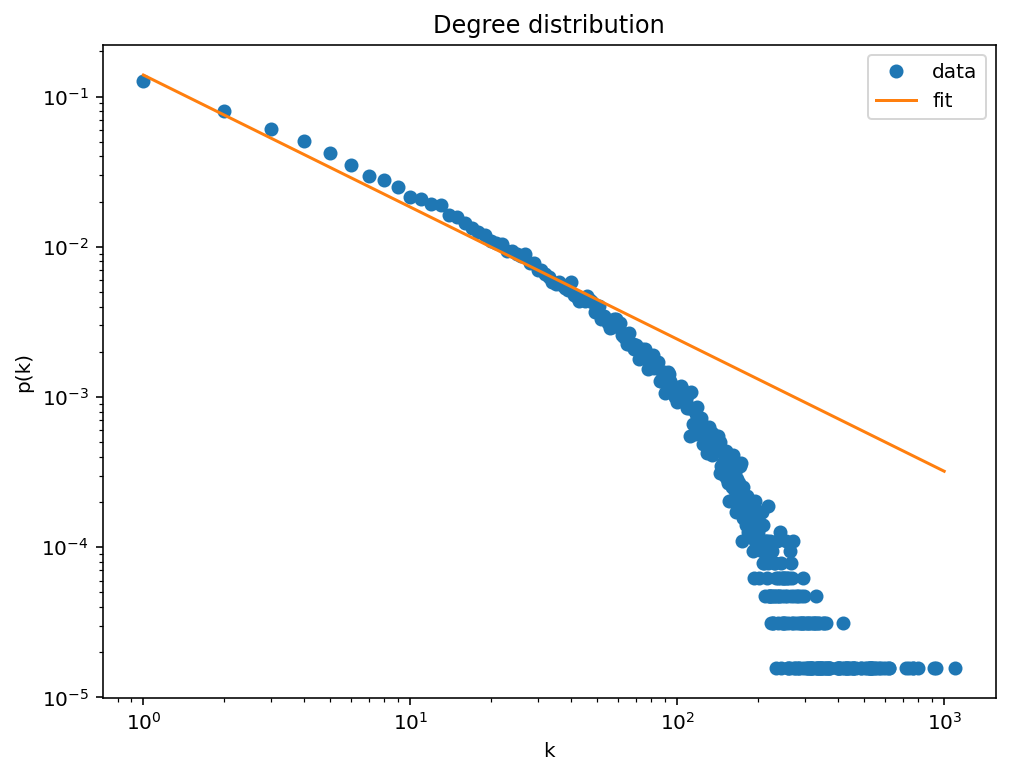

In [81]:
# actual vs fitted degree distribution
deg = list(g.degree_distribution().bins())
deg = np.array(deg)#[:, [0, -1]]

# model function
k = np.linspace(1, 1000, 1000)
m = model(k, *p_opt)

plt.figure(figsize=(8, 6))

plt.plot(deg[:, 0], deg[:, -1] / len(g.vs), 'o')  # actual data
plt.plot(k, m)  # fit

plt.xscale('log')
plt.yscale('log')

plt.xlabel('k')
plt.ylabel('p(k)')

plt.legend(["data", "fit"])
plt.title("Degree distribution")

plt.show()